In [77]:
import tensorflow
from tensorflow import keras

dataset = keras.datasets.fashion_mnist
((train_images, train_id), (test_images, test_id)) = dataset.load_data()

#Exploring the data
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


Text(0.5, 1.0, '9')

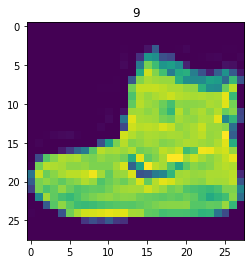

In [78]:
import matplotlib.pyplot as plt

plt.imshow(train_images[0])
plt.title(train_id[0])

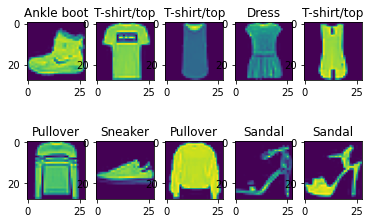

In [79]:
import numpy as np

# We have 10 types of classification
classifications_total = len(np.unique(train_id))

classification_names = ['T-shirt/top', 'Trouser','Pullover',
                        'Dress','Coat','Sandal',
                        'Shirt','Sneaker','Bag','Ankle boot']


for image in range(10):
    plt.subplot(2, 5, image + 1)
    plt.imshow(train_images[image])
    plt.title(classification_names[train_id[image]])    

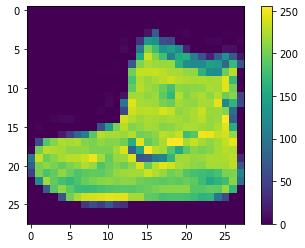

In [80]:
plt.imshow(train_images[0])
plt.colorbar()

## Normalizing images

In [81]:
# Normalize the color positions (from 0:255 to 0:1) 
train_images = train_images / float(255)

## Creating, compiling, training and normalizing a model 

Note: The outputs of a neural network is **((i * w) + b)** where :

    - i = input
    - w = weight (aka kernel)
    - b = bias



In [82]:

# Deep learning model pipeline: [Input, processing, output]
model = keras.Sequential([
    #Input
    keras.layers.Flatten(input_shape = (28, 28)), # Flattens the image (28 x 28) to a 1d array,
    #Processing
    keras.layers.Dense(256, activation = tensorflow.nn.relu), # Non-linear grouping to understand the curves of the image
    keras.layers.Dropout(0.2),
    #Output
    keras.layers.Dense(classifications_total, activation = tensorflow.nn.softmax)
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_id, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5275 - accuracy: 0.8116 - val_loss: 0.4131 - val_accuracy: 0.8498
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3987 - accuracy: 0.8543 - val_loss: 0.3662 - val_accuracy: 0.8669
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3630 - accuracy: 0.8659 - val_loss: 0.3509 - val_accuracy: 0.8734
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3408 - accuracy: 0.8753 - val_loss: 0.3537 - val_accuracy: 0.8683
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3216 - accuracy: 0.8805 - val_loss: 0.3504 - val_accuracy: 0.8727


## Model Summary

In [94]:
model_summary = model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


## Weights of first layer (Dense)

In [105]:
# Layer 1 (Dense)
dense_layer_weight = model.layers[1].get_weights()[0]
dense_layer_weight

array([[-0.07910664,  0.05490492, -0.01541737, ..., -0.01233758,
         0.03207012, -0.10365333],
       [ 0.15978655, -0.0217919 , -0.12543388, ..., -0.14324354,
        -0.0770756 , -0.10522495],
       [-0.05548925, -0.06504573, -0.14380835, ..., -0.17734192,
        -0.07153012,  0.04020927],
       ...,
       [-0.10015465,  0.07870691, -0.05055948, ...,  0.35529506,
         0.0598641 , -0.03497207],
       [ 0.01216343,  0.01982252, -0.11772807, ...,  0.37686235,
        -0.04591352, -0.05390191],
       [-0.0081898 ,  0.06174025, -0.02580663, ...,  0.18047829,
         0.07690121, -0.14038406]], dtype=float32)

In [98]:
dense_layer_bias = model.layers[1].get_weights()[1]
dense_layer_bias

array([ 0.15892705,  0.15464103, -0.12795386, -0.07645863, -0.01756474,
        0.03856048, -0.0128793 ,  0.131252  ,  0.07350766, -0.00443489,
        0.20523392,  0.19694717,  0.2824786 ,  0.08910221,  0.01103731,
        0.2502204 ,  0.17213166,  0.3268288 , -0.01463297, -0.11763066,
        0.27701315,  0.00573576,  0.08882507,  0.35871056,  0.3394677 ,
        0.1690156 , -0.07903992,  0.07287902,  0.01713156,  0.02846456,
        0.26992282,  0.06612672, -0.05684772, -0.01600333,  0.07042456,
        0.08021698, -0.00971109, -0.01723871, -0.00610622, -0.01358051,
        0.02734624,  0.20322277,  0.29726356, -0.01295718, -0.00756629,
        0.44889563,  0.00533281,  0.37476322,  0.1419271 ,  0.1361621 ,
        0.09258985,  0.29754624,  0.13989574, -0.10905354,  0.22901869,
        0.14511594,  0.26646587,  0.20555109, -0.0135143 ,  0.22849831,
       -0.01019562, -0.02653131,  0.21699111,  0.04618004, -0.01318862,
        0.28291702,  0.30177686, -0.06143628, -0.09183452,  0.15

In [112]:
dense_layer_weight_zeros = np.zeros(dense_layer_weight.shape)
#784, 256 = dense_layer_weight.shape
dense_layer_weight_random = np.random.rand(784, 256)

model.layers[1].set_weights([dense_layer_weight_random, dense_layer_bias])

model.layers[1].get_weights()


[array([[0.5578642 , 0.44190738, 0.11993045, ..., 0.03689195, 0.49426568,
         0.20500834],
        [0.55006194, 0.5458929 , 0.85454243, ..., 0.9988507 , 0.60960186,
         0.1284571 ],
        [0.10234029, 0.0301086 , 0.25402403, ..., 0.6340823 , 0.2694345 ,
         0.95610833],
        ...,
        [0.39418676, 0.5749739 , 0.6715864 , ..., 0.6220113 , 0.67298555,
         0.7316275 ],
        [0.15859292, 0.28785482, 0.7300858 , ..., 0.17111844, 0.36099955,
         0.78173584],
        [0.36769673, 0.75000757, 0.383783  , ..., 0.91196936, 0.5675577 ,
         0.7204083 ]], dtype=float32),
 array([ 0.15892705,  0.15464103, -0.12795386, -0.07645863, -0.01756474,
         0.03856048, -0.0128793 ,  0.131252  ,  0.07350766, -0.00443489,
         0.20523392,  0.19694717,  0.2824786 ,  0.08910221,  0.01103731,
         0.2502204 ,  0.17213166,  0.3268288 , -0.01463297, -0.11763066,
         0.27701315,  0.00573576,  0.08882507,  0.35871056,  0.3394677 ,
         0.1690156 , -0.07903

In [113]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_id, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 6s 3ms/step - loss: 112.1309 - accuracy: 0.4155 - val_loss: 18.6109 - val_accuracy: 0.6998
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 30.2854 - accuracy: 0.6316 - val_loss: 9.3461 - val_accuracy: 0.7723
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 13.8106 - accuracy: 0.7024 - val_loss: 4.8931 - val_accuracy: 0.7985
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 6.7117 - accuracy: 0.7345 - val_loss: 4.3050 - val_accuracy: 0.7204
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 3.7277 - accuracy: 0.7558 - val_loss: 1.9931 - val_accuracy: 0.8289


In [117]:
dense_layer_bias = model.layers[1].get_weights()[1]
dense_layer_bias_zeros  = np.zeros(dense_layer_bias.shape)
dense_layer_weight_zeros = np.zeros(dense_layer_weight.shape)

model.layers[1].set_weights([dense_layer_weight_zeros, dense_layer_bias_zeros])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_id, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.4357 - accuracy: 0.1001 - val_loss: 2.3299 - val_accuracy: 0.0995
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3100 - accuracy: 0.1001 - val_loss: 2.3034 - val_accuracy: 0.0995
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3029 - accuracy: 0.1002 - val_loss: 2.3028 - val_accuracy: 0.0983
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3027 - val_accuracy: 0.0983
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0977 - val_loss: 2.3028 - val_accuracy: 0.0957


## Exporting and loading a model

In [83]:
model.save('model_epochs5_nodes3.h5')

from tensorflow.keras.models import load_model

saved_model = load_model('model_epochs5_nodes3.h5')

## Visualizing accuracy by epoch

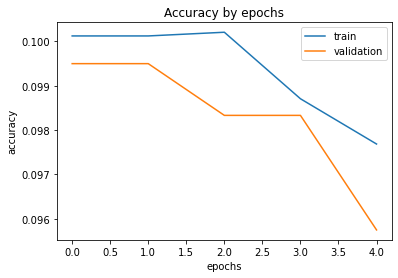

In [118]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy by epochs')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])

## Visualizing loss by epoch

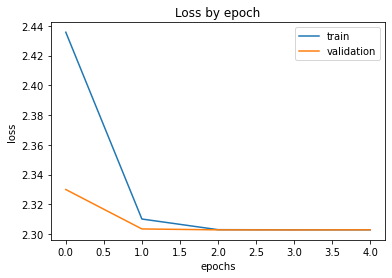

In [119]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss by epoch')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])

## Testing model and saved model

In [86]:
import numpy as np

tests = model.predict(test_images)
print('test result:', np.argmax(tests[1]))
print('test image number:', test_id[1])

saved_model_test = saved_model.predict(test_images)
print('saved model test: ', np.argmax(saved_model_test[1]))
print('test image number:', test_id[1])

test result: 2
test image number: 2
saved model test:  2
test image number: 2


## Validating the model

In [88]:
test_loss, accuracy_test =  model.evaluate(test_images, test_id)

print('Test Loss', test_loss)
print('Accuracy Test', accuracy_test)

313/313 [==============================] - 1s 2ms/step - loss: 60.7131 - accuracy: 0.8519
Test Loss 60.71308135986328
Accuracy Test 0.8518999814987183
